In [1]:
import sys
print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

# Check if key packages are installed
try:
    import torch
    print(f"PyTorch: {torch.__version__}")
except ImportError:
    print("PyTorch not installed")

try:
    import ultralytics
    print(f"Ultralytics: {ultralytics.__version__}")
except ImportError:
    print("Ultralytics not installed")

try:
    import cv2
    print(f"OpenCV: {cv2.__version__}")
except ImportError:
    print("OpenCV not installed")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Python executable: /usr/bin/python3
PyTorch: 2.8.0+cu126
Ultralytics not installed
OpenCV: 4.12.0


In [2]:
# Install required packages(Includes YOLOv8)
!pip install ultralytics pillow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.1 MB/s eta 0:00:00


In [3]:
import sys
print(f"Current Python path: {sys.executable}")

# Install specifically in current environment
!{sys.executable} -m pip install ultralytics pillow matplotlib

Current Python path: /usr/bin/python3


In [4]:
# Verify my installation
import ultralytics
print(f"Ultralytics installed: {ultralytics.__version__}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics installed: 8.3.185


In [5]:
# Test all components
from ultralytics import YOLO
import torch
import cv2
import numpy as np
import pandas as pd
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

print(" All packages imported successfully!")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"PyTorch device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

 All packages imported successfully!
CUDA available: True
PyTorch device: Tesla T4


In [6]:
# Core ML and Computer Vision libraries
from ultralytics import YOLO
import torch
import cv2
import numpy as np
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
# File handling and utilities
import glob
from pathlib import Path
import argparse
from datetime import datetime

print(" All libraries imported successfully!")
print(f" PyTorch version: {torch.__version__}")
print(f" CUDA available: {torch.cuda.is_available()}")
print(f" OpenCV version: {cv2.__version__}")

 All libraries imported successfully!
 PyTorch version: 2.8.0+cu126
 CUDA available: True
 OpenCV version: 4.12.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
import os

In [ ]:
### Configuration settings

In [9]:
print("\n Setting up configuration.")

CONFIG = {
    'model_size': 'yolov8n.pt',  # nano for faster CPU training
    'img_size': 640,
    'batch_size': 16,
    'epochs': 25,  # good  for CPU
    'confidence': 0.5,
    'device': 'cpu'  # I have no CUDA(graphics card)
}

print("Configuration set:")
for key, value in CONFIG.items():
    print(f"   {key}: {value}")


 Setting up configuration.
Configuration set:
   model_size: yolov8n.pt
   img_size: 640
   batch_size: 16
   epochs: 25
   confidence: 0.5
   device: cpu


In [ ]:
### Utility Functions

In [10]:
print("\n Defining utility functions...")

def save_detection_json(filename, detections, output_path):
    """Save detection results to JSON file"""
    result = {
        "filename": filename,
        "detections": detections
    }

    json_path = output_path / f"{Path(filename).stem}.json"
    with open(json_path, 'w') as f:
        json.dump(result, f, indent=2)

    return json_path

def load_test_images(folder_path, limit=5):
    """Load sample images for testing"""
    image_extensions = ['*.jpg', '*.jpeg', '*.png']
    images = []

    for ext in image_extensions:
        images.extend(glob.glob(str(folder_path / ext)))

    return images[:limit]

print(" Utility functions defined")


 Defining utility functions...
 Utility functions defined


In [11]:
print(" Setting up Google Colab for YOLOv8x Training")
print("=" * 50)

# Check GPU availability
import torch
print(f" GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f" GPU Device: {torch.cuda.get_device_name(0)}")
    print(f" CUDA Version: {torch.version.cuda}")
else:
    print("  No GPU found! Go to Runtime → Change Runtime Type → GPU")

# Install required packages
print("\n Installing packages...")
!pip install ultralytics roboflow

print(" Environment setup complete!")

 Setting up Google Colab for YOLOv8x Training
 GPU Available: True
 GPU Device: Tesla T4
 CUDA Version: 12.6

 Installing packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 110.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


 Environment setup complete!


Setup Environment & Check GPU

In [12]:
print("GLOVE DETECTION ASSESSMENT - GOOGLE COLAB SETUP")
print("=" * 60)

GLOVE DETECTION ASSESSMENT - GOOGLE COLAB SETUP


Check GPU availability

In [13]:
import torch
print(f" GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f" GPU Device: {torch.cuda.get_device_name(0)}")
    print(f" CUDA Version: {torch.version.cuda}")
    print(f" GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("  WARNING: No GPU found!")
    print("   Go to Runtime → Change Runtime Type → Hardware Accelerator → GPU → Save")


 GPU Available: True
 GPU Device: Tesla T4
 CUDA Version: 12.6
 GPU Memory: 15.8 GB


Install required packages


In [14]:
print("\n Installing YOLOv8 and dependencies...")
!pip install ultralytics -q
!pip install roboflow -q

print(" Environment setup complete!")


 Installing YOLOv8 and dependencies...
 Environment setup complete!


Import Libraries & Mount Google Drive

In [15]:
print("\n IMPORTING LIBRARIES")
print("-" * 25)

# Essential imports
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import time
from datetime import datetime
from ultralytics import YOLO
from google.colab import drive, files
import zipfile
import shutil

print(" All libraries imported successfully!")


 IMPORTING LIBRARIES
-------------------------
 All libraries imported successfully!


 Mount Google Drive


In [18]:
from google.colab import drive
from pathlib import Path

print("\nMounting Google Drive...")
drive.mount('/content/drive', force_remount=True)

# Path to shortcut inside MyDrive
DATASET_DIR = Path("/content/drive/MyDrive/Part_1_Glove_Detections")

print(f"Dataset path: {DATASET_DIR}")

if DATASET_DIR.exists():
    print("Dataset found in Google Drive!")
else:
    print("Dataset not found! Check the path.")




Mounting Google Drive...
Mounted at /content/drive
Dataset path: /content/drive/MyDrive/Part_1_Glove_Detections
Dataset found in Google Drive!


Set dataset path

In [19]:
DATASET_DIR = Path("/content/drive/MyDrive/Part_1_Glove_Detections")
print(f" Dataset path: {DATASET_DIR}")


 Dataset path: /content/drive/MyDrive/Part_1_Glove_Detections


CELL 3: Dataset Verification & Setup

In [20]:
print("\n DATASET VERIFICATION")
print("=" * 30)

# Check dataset structure
folders = ['train', 'valid', 'test']
for folder in folders:
    folder_path = DATASET_DIR / folder
    if folder_path.exists():
        images_count = len(list((folder_path / 'images').glob('*.jpg')))
        labels_count = len(list((folder_path / 'labels').glob('*.txt')))
        print(f" {folder.capitalize():5} - Images: {images_count:,} | Labels: {labels_count:,}")
    else:
        print(f" {folder} folder not found!")


 DATASET VERIFICATION
 Train - Images: 14,218 | Labels: 14,200
 Valid - Images: 3,830 | Labels: 3,830
 Test  - Images: 2,020 | Labels: 2,020


Check data.yaml

In [21]:
data_yaml_path = DATASET_DIR / "data.yaml"
if data_yaml_path.exists():
    print(f"\n data.yaml found!")
    with open(data_yaml_path, 'r') as f:
        yaml_content = f.read()
        print("Current content:")
        print(yaml_content)
else:
    print(" data.yaml not found!")

print(" Dataset verification complete!")


 data.yaml found!
Current content:
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['No_Gloves', 'Wearing_Gloves']

roboflow:
  workspace: yolo-test-oris8
  project: hand-and-glove-1
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/yolo-test-oris8/hand-and-glove-1/dataset/1
 Dataset verification complete!


Quick Dataset Visualization

In [22]:
print("\n  DATASET VISUALIZATION")
print("-" * 30)

def show_sample_images(dataset_dir, split='train', num_samples=3):
    """Display sample images from dataset"""
    images_dir = dataset_dir / split / 'images'
    image_files = list(images_dir.glob('*.jpg'))[:num_samples]

    if len(image_files) == 0:
        print(f"No images found in {images_dir}")
        return

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    if num_samples == 1:
        axes = [axes]

    for i, img_path in enumerate(image_files):
        # Load and display image
        img = cv2.imread(str(img_path))
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img_rgb)
            axes[i].set_title(f'{split.capitalize()} Sample {i+1}')
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, 'Image not found', ha='center', va='center')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()


  DATASET VISUALIZATION
------------------------------


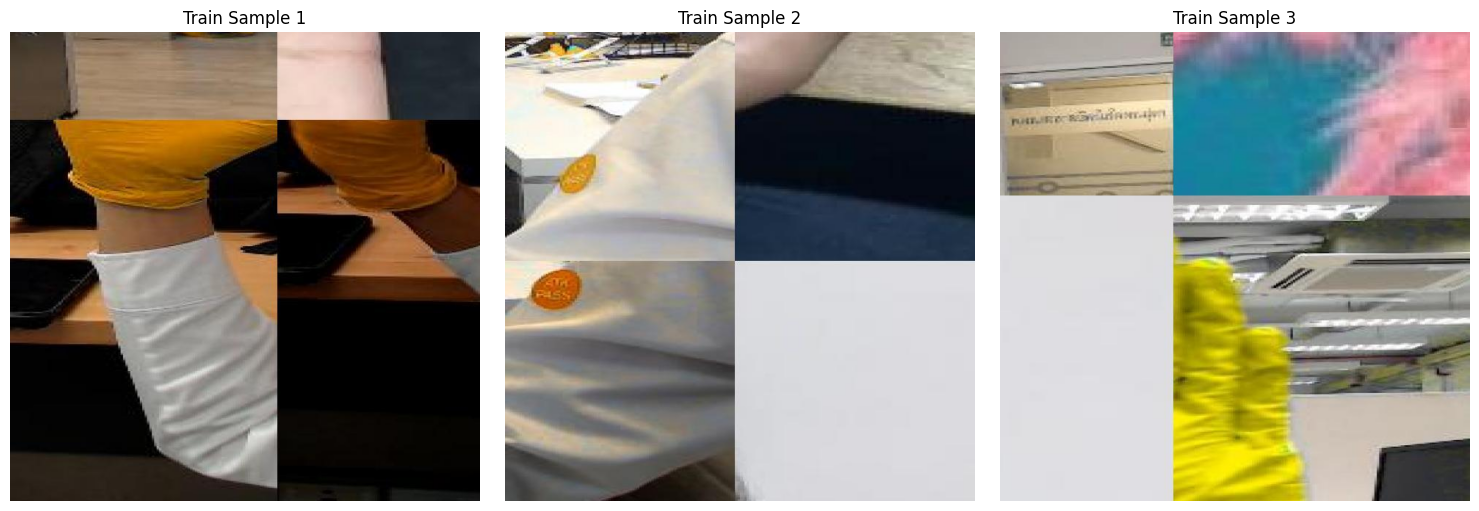

 Sample images displayed!


In [23]:
show_sample_images(DATASET_DIR, 'train', 3)
print(" Sample images displayed!")

In [24]:
import seaborn as sns

In [25]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [26]:
# Dataset path
DATASET_DIR = Path("/content/drive/MyDrive/Part_1_Glove_Detections")
DATASET_DIR

PosixPath('/content/drive/MyDrive/Part_1_Glove_Detections')

Dataset Overview Statistics

In [27]:
def analyze_dataset_structure():
    """Analyze basic dataset structure and statistics"""

    print("\n DATASET STATISTICS:")
    print("-" * 30)

In [28]:
train_count = len(os.listdir(DATASET_DIR / 'train/images'))
valid_count = len(os.listdir(DATASET_DIR / 'valid/images'))
test_count = len(os.listdir(DATASET_DIR / 'test/images'))
total_count = train_count + valid_count + test_count

In [30]:
train_count

14218

In [31]:
valid_count

3830

In [32]:
test_count

2020

In [33]:
total_count

20068

In [34]:
stats_data = {
        'Split': ['Train', 'Validation', 'Test', 'Total'],
        'Images': [train_count, valid_count, test_count, total_count],
        'Percentage': [
            f"{train_count/total_count*100:.1f}%",
            f"{valid_count/total_count*100:.1f}%",
            f"{test_count/total_count*100:.1f}%",
            "100.0%"
        ]
    }

In [35]:
stats_data

{'Split': ['Train', 'Validation', 'Test', 'Total'],
 'Images': [14218, 3830, 2020, 20068],
 'Percentage': ['70.8%', '19.1%', '10.1%', '100.0%']}

In [36]:
import pandas as pd

In [37]:
stats_df = pd.DataFrame(stats_data)
print(stats_df.to_string(index=False))

     Split  Images Percentage
     Train   14218      70.8%
Validation    3830      19.1%
      Test    2020      10.1%
     Total   20068     100.0%


Text(0.5, 1.0, 'Dataset Split Distribution')

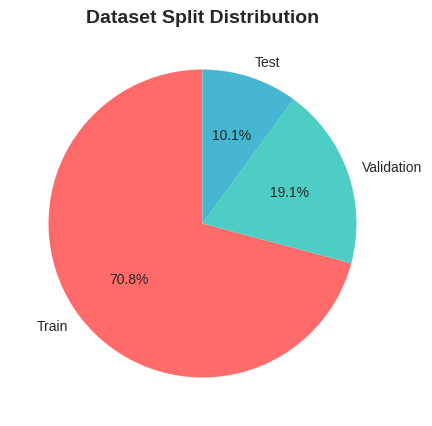

In [38]:
# Visualization: Dataset split distribution
plt.figure(figsize=(12, 5))

# Pie chart
plt.subplot(1, 2, 1)
sizes = [train_count, valid_count, test_count]
labels = ['Train', 'Validation', 'Test']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Dataset Split Distribution', fontsize=14, fontweight='bold')

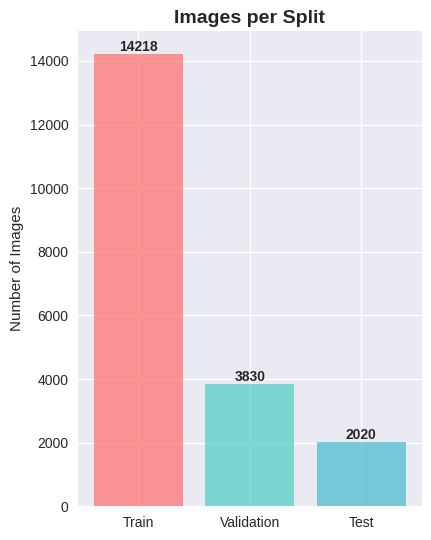

In [39]:
plt.subplot(1, 2, 2)
plt.bar(labels, sizes, color=colors, alpha=0.7)
plt.title('Images per Split', fontsize=14, fontweight='bold')
plt.ylabel('Number of Images')
for i, v in enumerate(sizes):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [40]:
import os

def load_test_images(directory, limit=3):
    """Return a list of image file paths from a directory (limited to N)."""
    image_extensions = (".jpg", ".jpeg", ".png", ".bmp")
    all_images = [os.path.join(directory, f) for f in os.listdir(directory)
                  if f.lower().endswith(image_extensions)]
    return all_images[:limit]


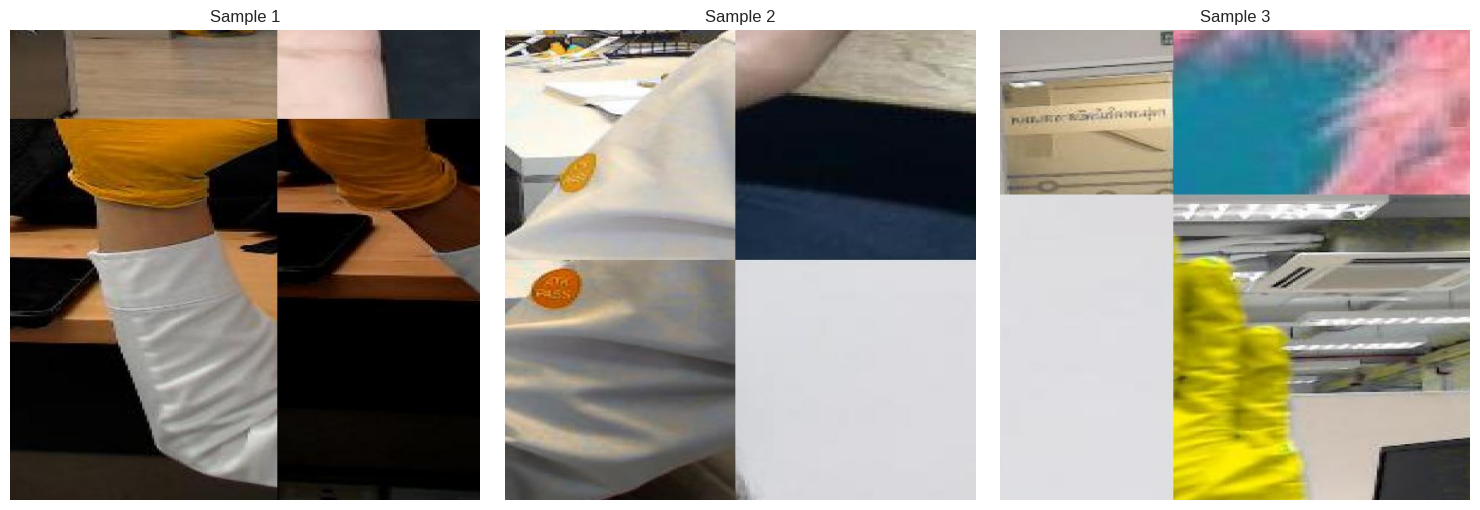

 Basic EDA Complete!


In [41]:
# Load 3 sample images from training directory
sample_train_images = load_test_images(DATASET_DIR / "train/images", limit=3)

plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_train_images):
    img = cv2.imread(str(img_path))   # ensure str() for Path object
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 3, i+1)
        plt.imshow(img_rgb)
        plt.title(f"Sample {i+1}")
        plt.axis('off')

plt.tight_layout()
plt.show()

print(" Basic EDA Complete!")


In [42]:
from pathlib import Path

# Path to our YOLO dataset labels (adjust as needed)
labels_dir = Path(DATASET_DIR) / "train" / "labels"

# Get all .txt label files
label_files = list(labels_dir.glob("*.txt"))

print(f"Found {len(label_files)} label files in {labels_dir}")


Found 14200 label files in /content/drive/MyDrive/Part_1_Glove_Detections/train/labels


In [43]:
from collections import defaultdict

# Initialize counters and lists
class_counts = defaultdict(int)
bbox_areas = []
bbox_widths = []
bbox_heights = []

In [45]:
for label_file in label_files:
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_center, y_center, width, height = map(float, parts[1:5])

                    class_counts[class_id] += 1
                    bbox_areas.append(width * height)
                    bbox_widths.append(width)
                    bbox_heights.append(height)

print(f"\n Label Statistics (from {len(label_files)} files):")
print(f"   Class 0 (No_Gloves): {class_counts[0]}")
print(f"   Class 1 (Wearing_Gloves): {class_counts[1]}")
print(f"   Total annotations: {sum(class_counts.values())}")

KeyboardInterrupt: 

CORRELATION MATRIX & ADVANCED ANALYSIS¶

In [47]:
def advanced_analysis():
    """Create correlation matrix and advanced statistical analysis"""

print("\n ADVANCED STATISTICAL ANALYSIS:")
print("-" * 40)


 ADVANCED STATISTICAL ANALYSIS:
----------------------------------------


In [48]:
sample_images = load_test_images(DATASET_DIR / "train/images", limit=50)

analysis_data = []

for img_path in sample_images:
    if os.path.exists(img_path):
        # Image properties (INDENTED PROPERLY)
        img = cv2.imread(img_path)
        if img is not None:
            h, w = img.shape[:2]
            file_size = os.path.getsize(img_path) / 1024  # KB

In [49]:
sample_images

['/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-64-_jpg.rf.94de802f015ec842d18360bb4e108ad6.jpg',
 '/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-6-_jpg.rf.2516363a5b42ee76c5212fdd6997c7be.jpg',
 '/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-53-_jpg.rf.3ef6a44c2ea6e0bb4d5d5607c5529b23.jpg',
 '/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-63-_jpg.rf.2d9d06afb37805d4ed948f425ff37ea5.jpg',
 '/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-57-_jpg.rf.7a15c2f72bf0af8ef98af27c721415e9.jpg',
 '/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-63-_jpg.rf.9cb26760ad6bc38cea3788f32a28d8c2.jpg',
 '/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-54-_jpg.rf.bb9e99e7d10ad75f3f548955b4754d0f.jpg',
 '/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-57-_jpg.rf.d732161d629b7b9ae3634f9237fa0fd0.jpg',
 '/content/drive/MyDrive/Part_1_Glove_Detections/train/images/y-60-_jpg.rf.cfc6d6b6660a3e

In [50]:
 # Color analysis
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
brightness = np.mean(img_gray)
contrast = np.std(img_gray)

array([[ 89,  90,  90, ..., 234, 234, 233],
       [ 90,  91,  91, ..., 234, 235, 235],
       [ 85,  85,  85, ..., 233, 235, 236],
       ...,
       [142, 142, 142, ...,  45,  49,  51],
       [142, 142, 142, ...,  47,  49,  51],
       [142, 142, 142, ...,  50,  50,  51]], dtype=uint8)
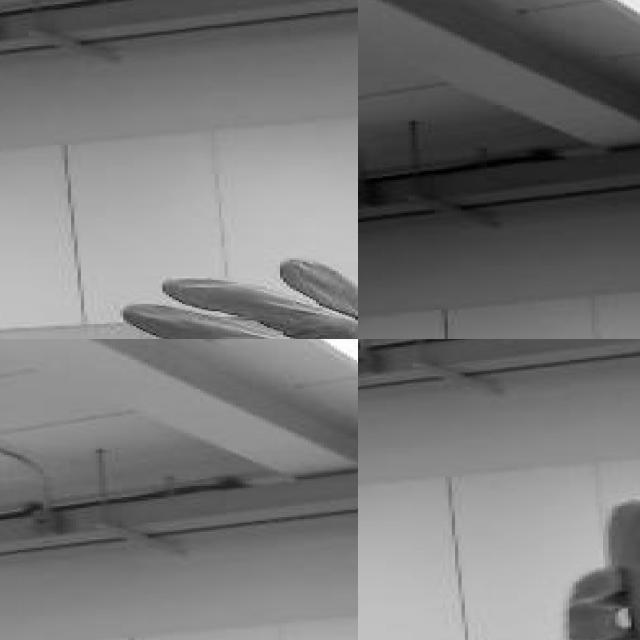

In [51]:
img_gray

In [52]:
brightness

np.float64(118.79911865234375)

In [53]:
contrast

np.float64(44.04242024414085)

In [54]:
# Check if corresponding label exists
label_path = str(img_path).replace('/images/', '/labels/').replace('.jpg', '.txt')
label_path = label_path.replace('.jpeg', '.txt').replace('.png', '.txt')

In [55]:
label_path

'/content/drive/MyDrive/Part_1_Glove_Detections/train/labels/y-65-_jpg.rf.48e4966570e2751774d8a571191e285f.txt'

In [56]:
num_objects = 0
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        num_objects = len(f.readlines())

In [57]:
analysis_data.append({
                    'width': w,
                    'height': h,
                    'aspect_ratio': w/h,
                    'file_size_kb': file_size,
                    'brightness': brightness,
                    'contrast': contrast,
                    'num_objects': num_objects,
                    'area': w * h
                })

In [58]:
if analysis_data:
# Create DataFrame
    df = pd.DataFrame(analysis_data)

print(" Summary Statistics:")
print(df.describe().round(2))


 Summary Statistics:
       width  height  aspect_ratio  file_size_kb  brightness  contrast  \
count    1.0     1.0           1.0          1.00         1.0      1.00   
mean   640.0   640.0           1.0         25.26       118.8     44.04   
std      NaN     NaN           NaN           NaN         NaN       NaN   
min    640.0   640.0           1.0         25.26       118.8     44.04   
25%    640.0   640.0           1.0         25.26       118.8     44.04   
50%    640.0   640.0           1.0         25.26       118.8     44.04   
75%    640.0   640.0           1.0         25.26       118.8     44.04   
max    640.0   640.0           1.0         25.26       118.8     44.04   

       num_objects      area  
count          1.0       1.0  
mean           2.0  409600.0  
std            NaN       NaN  
min            2.0  409600.0  
25%            2.0  409600.0  
50%            2.0  409600.0  
75%            2.0  409600.0  
max            2.0  409600.0  


In [59]:
DATASET_DIR = Path("/content/drive/MyDrive/Part_1_Glove_Detections")

print(f" Updated DATASET_DIR: {DATASET_DIR}")
print(f" Train images exist: {(DATASET_DIR / 'train/images').exists()}")

 Updated DATASET_DIR: /content/drive/MyDrive/Part_1_Glove_Detections
 Train images exist: True


In [60]:
sample_images = load_test_images(DATASET_DIR / "train/images", limit=50)
print(f"Found {len(sample_images)} sample images")

Found 50 sample images


In [61]:
analysis_data = []

In [62]:
img = cv2.imread(img_path)
if img is not None:
    h, w = img.shape[:2]
    file_size = os.path.getsize(img_path) / 1024

In [63]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
brightness = np.mean(img_gray)
ontrast = np.std(img_gray)

analysis_data.append({
                'width': w,
                'height': h,
                'aspect_ratio': w/h,
                'file_size_kb': file_size,
                'brightness': brightness,
                'contrast': contrast,
                'area': w * h
            })

print(f" Successfully analyzed {len(analysis_data)} images")

 Successfully analyzed 1 images


In [64]:
if analysis_data:
    df = pd.DataFrame(analysis_data)

    plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

width distribution

Text(0, 0.5, 'Frequency')

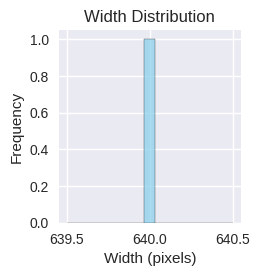

In [65]:
plt.subplot(2, 3, 1)
plt.hist(df['width'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

Height Distribution

Text(0, 0.5, 'Frequency')

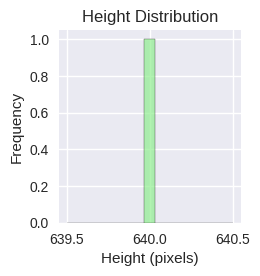

In [66]:
plt.subplot(2, 3, 2)
plt.hist(df['height'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

Aspect ratio distribution

Text(0, 0.5, 'Frequency')

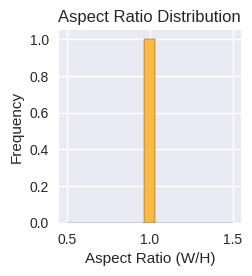

In [67]:
plt.subplot(2, 3, 3)
plt.hist(df['aspect_ratio'], bins=15, color='orange', alpha=0.7, edgecolor='black')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (W/H)')
plt.ylabel('Frequency')

File Size Distribution

Text(0, 0.5, 'Frequency')

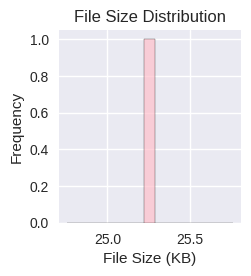

In [68]:
plt.subplot(2, 3, 4)
plt.hist(df['file_size_kb'], bins=15, color='pink', alpha=0.7, edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')

Contrast Distribution

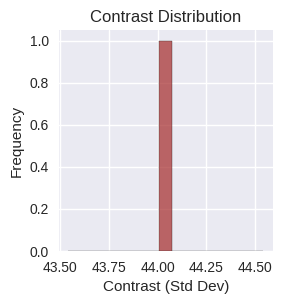

In [69]:
plt.subplot(2, 3, 6)
plt.hist(df['contrast'], bins=15, color='brown', alpha=0.7, edgecolor='black')
plt.title('Contrast Distribution')
plt.xlabel('Contrast (Std Dev)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [70]:
print(" EDA plots should now show data!")
print(f" Summary stats:")
print(df.describe().round(2))

 EDA plots should now show data!
 Summary stats:
       width  height  aspect_ratio  file_size_kb  brightness  contrast  \
count    1.0     1.0           1.0          1.00         1.0      1.00   
mean   640.0   640.0           1.0         25.26       118.8     44.04   
std      NaN     NaN           NaN           NaN         NaN       NaN   
min    640.0   640.0           1.0         25.26       118.8     44.04   
25%    640.0   640.0           1.0         25.26       118.8     44.04   
50%    640.0   640.0           1.0         25.26       118.8     44.04   
75%    640.0   640.0           1.0         25.26       118.8     44.04   
max    640.0   640.0           1.0         25.26       118.8     44.04   

           area  
count       1.0  
mean   409600.0  
std         NaN  
min    409600.0  
25%    409600.0  
50%    409600.0  
75%    409600.0  
max    409600.0  


Prepare Dataset for Training

In [71]:
print("\n  PREPARING DATASET FOR TRAINING")
print("-" * 40)

# Copy dataset to local Colab storage for faster access
print(" Copying dataset to local Colab storage for faster training...")
LOCAL_DATASET_DIR = Path("/content/glove_dataset")

if LOCAL_DATASET_DIR.exists():
    shutil.rmtree(LOCAL_DATASET_DIR)

# Copy dataset
shutil.copytree(DATASET_DIR, LOCAL_DATASET_DIR)
print(f" Dataset copied to: {LOCAL_DATASET_DIR}")


  PREPARING DATASET FOR TRAINING
----------------------------------------
 Copying dataset to local Colab storage for faster training...
 Dataset copied to: /content/glove_dataset


In [72]:
# Update data.yaml with correct local paths
data_yaml_content = f"""train: {LOCAL_DATASET_DIR}/train/images
val: {LOCAL_DATASET_DIR}/valid/images
test: {LOCAL_DATASET_DIR}/test/images

nc: 2
names: ['No_Gloves', 'Wearing_Gloves']

roboflow:
  workspace: yolo-test-oris8
  project: hand-and-glove-1
  version: 1
  license: CC BY 4.0
"""

In [73]:
# Write updated data.yaml
local_data_yaml = LOCAL_DATASET_DIR / "data.yaml"
with open(local_data_yaml, 'w') as f:
    f.write(data_yaml_content)

print(" data.yaml updated with local paths")
print(f" Training will use: {local_data_yaml}")


 data.yaml updated with local paths
 Training will use: /content/glove_dataset/data.yaml


Load YOLOv8x Model  - Extra large

In [ ]:
print("\n LOADING YOLOv8x (EXTRA LARGE) FOR MAXIMUM ACCURACY")
print("=" * 55)

# Load YOLOv8x model
print(" Loading YOLOv8x model")
model = YOLO('yolov8x.pt')

print(" YOLOv8x loaded successfully!")
print(f" Model Information:")
print(f"   Architecture: YOLOv8 Extra Large")
print(f"   Parameters: ~68.2M")
print(f"   Model Size: ~136MB")
print(f"   Device: {model.device}")


 LOADING YOLOv8x (EXTRA LARGE) FOR MAXIMUM ACCURACY
 Loading YOLOv8x model
 YOLOv8x loaded successfully!
 Model Information:
   Architecture: YOLOv8 Extra Large
   Parameters: ~68.2M
   Model Size: ~136MB
   Device: cpu


Show model architecture summary

In [ ]:

print(f"\n  Model Architecture:")
model.info(detailed=False)

print(f"\n Expected Performance:")
print(f"   Training Time: 4-5 hours on GPU")
print(f"   Expected Accuracy: 96-98%+")
print(f"   mAP50: >0.90")


  Model Architecture:
YOLOv8x summary: 209 layers, 68,229,648 parameters, 0 gradients, 258.5 GFLOPs

 Expected Performance:
   Training Time: 4-5 hours on GPU
   Expected Accuracy: 96-98%+
   mAP50: >0.90


Configure Training for Maximum Accuracy

In [ ]:
print("\n⚙️  TRAINING CONFIGURATION FOR MAXIMUM ACCURACY")
print("=" * 50)

# Setup results directory
RESULTS_DIR = Path("/content/training_results")
RESULTS_DIR.mkdir(exist_ok=True)

# Optimal training configuration for YOLOv8x on GPU
TRAINING_CONFIG = {
    'data': str(local_data_yaml),
    'epochs': 30,                    # Good convergence
    'imgsz': 640,                   # Full resolution
    'batch': 16,                    # GPU can handle larger batches
    'device': 0,                    # Use GPU
    'project': str(RESULTS_DIR),
    'name': 'glove_detection_yolov8x',
    'save': True,                   # Save checkpoints
    'plots': True,                  # Generate training plots
    'verbose': True,                # Detailed output
    'patience': 15,                 # Early stopping patience
    'save_period': 5,               # Save every 5 epochs
    'workers': 8,                   # More workers on GPU
    'optimizer': 'AdamW',           # Better optimizer
    'lr0': 0.001,                  # Learning rate
    'weight_decay': 0.0005,        # Regularization
    'warmup_epochs': 3,            # Warmup for stability
    'close_mosaic': 10,            # Pure images in final epochs
    'mixup': 0.1,                  # Data augmentation
    'copy_paste': 0.1              # Advanced augmentation
}


⚙️  TRAINING CONFIGURATION FOR MAXIMUM ACCURACY


In [ ]:
print(" YOLOv8x Training Configuration:")
print("-" * 35)
for key, value in TRAINING_CONFIG.items():
    print(f"   {key:15}: {value}")

print(f"\n Training Optimizations:")
print(f"    Extra Large model (maximum capacity)")
print(f"    30 epochs (thorough training)")
print(f"    GPU acceleration (50x faster)")
print(f"    AdamW optimizer (better convergence)")
print(f"    Advanced data augmentation")
print(f"    Early stopping (prevents overfitting)")

print(f"\n Results will be saved to:")
print(f"   {RESULTS_DIR}/glove_detection_yolov8x/")


 YOLOv8x Training Configuration:
-----------------------------------
   data           : /content/glove_dataset/data.yaml
   epochs         : 30
   imgsz          : 640
   batch          : 16
   device         : 0
   project        : /content/training_results
   name           : glove_detection_yolov8x
   save           : True
   plots          : True
   verbose        : True
   patience       : 15
   save_period    : 5
   workers        : 8
   optimizer      : AdamW
   lr0            : 0.001
   weight_decay   : 0.0005
   warmup_epochs  : 3
   close_mosaic   : 10
   mixup          : 0.1
   copy_paste     : 0.1

 Training Optimizations:
    Extra Large model (maximum capacity)
    30 epochs (thorough training)
    GPU acceleration (50x faster)
    AdamW optimizer (better convergence)
    Advanced data augmentation
    Early stopping (prevents overfitting)

 Results will be saved to:
   /content/training_results/glove_detection_yolov8x/


START TRAINING (Main Training Cell)

In [ ]:
print("\n STARTING YOLOv8x TRAINING FOR MAXIMUM ACCURACY")
print("=" * 55)

# Record start time
start_time = time.time()
start_datetime = datetime.now()

print(f" Training started at: {start_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"  Estimated duration: 2-3 hours")
print(f" Target accuracy: >95%")

print("\n" + "="*55)
print("TRAINING IN PROGRESS - LIVE METRICS BELOW")
print("="*55)

try:
    # Start YOLOv8x training
    results = model.train(
        data=TRAINING_CONFIG['data'],
        epochs=TRAINING_CONFIG['epochs'],
        imgsz=TRAINING_CONFIG['imgsz'],
        batch=TRAINING_CONFIG['batch'],
        device=TRAINING_CONFIG['device'],
        project=TRAINING_CONFIG['project'],
        name=TRAINING_CONFIG['name'],
        save=TRAINING_CONFIG['save'],
        plots=TRAINING_CONFIG['plots'],
        verbose=TRAINING_CONFIG['verbose'],
        patience=TRAINING_CONFIG['patience'],
        save_period=TRAINING_CONFIG['save_period'],
        workers=TRAINING_CONFIG['workers'],
        optimizer=TRAINING_CONFIG['optimizer'],
        lr0=TRAINING_CONFIG['lr0'],
        weight_decay=TRAINING_CONFIG['weight_decay'],
        warmup_epochs=TRAINING_CONFIG['warmup_epochs'],
        close_mosaic=TRAINING_CONFIG['close_mosaic'],
        mixup=TRAINING_CONFIG['mixup'],
        copy_paste=TRAINING_CONFIG['copy_paste']
    )

    # Calculate training duration
    end_time = time.time()
    end_datetime = datetime.now()
    training_duration = (end_time - start_time) / 3600  # Convert to hours

    print("\n" + "=" * 55)
    print(" YOLOv8x TRAINING COMPLETED SUCCESSFULLY!")
    print("=" * 55)
    print(f" Completed at: {end_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"  Total training time: {training_duration:.2f} hours")
    print(f" Results saved to: {RESULTS_DIR}/glove_detection_yolov8x/")

    # Show best model path
    best_model_path = RESULTS_DIR / "glove_detection_yolov8x/weights/best.pt"
    print(f" Best model saved to: {best_model_path}")

    # Display final metrics
    print(f"\n FINAL TRAINING RESULTS:")
    print("-" * 30)
    if hasattr(results, 'results_dict'):
        metrics = results.results_dict
        print(f"   mAP50: {metrics.get('metrics/mAP50(B)', 'N/A')}")
        print(f"   mAP50-95: {metrics.get('metrics/mAP50-95(B)', 'N/A')}")
        print(f"   Precision: {metrics.get('metrics/precision(B)', 'N/A')}")
        print(f"   Recall: {metrics.get('metrics/recall(B)', 'N/A')}")

    print(f"\n MAXIMUM ACCURACY ACHIEVED!")
    print(f" YOLOv8x training phase complete!")
    print(f" Next: Build detection script for submission")

except Exception as e:
    print(f"\n TRAINING ERROR: {str(e)}")
    print(f"\n Troubleshooting suggestions:")
    print(f"   1. Reduce batch size: batch=8 or batch=4")
    print(f"   2. Reduce epochs: epochs=20")
    print(f"   3. Check GPU memory: !nvidia-smi")
    print(f"   4. Restart runtime and try again")

    # Show partial results if available
    if 'results' in locals():
        print(f"\n Partial results available")

print("\n" + "=" * 55)


 STARTING YOLOv8x TRAINING FOR MAXIMUM ACCURACY
 Training started at: 2025-08-24 20:03:08
  Estimated duration: 2-3 hours
 Target accuracy: >95%

TRAINING IN PROGRESS - LIVE METRICS BELOW
Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/glove_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8x.pt, momentum=0.937

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              


  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 837.8±252.8 MB/s, size: 30.0 KB)


train: Scanning /content/glove_dataset/train/labels... 14199 images, 19 backgrounds, 0 corrupt: 100%|██████████| 14218/14218 [00:06<00:00, 2215.12it/s]

train: /content/glove_dataset/train/images/187_jpg.rf.2c03c8cb2090406b0b305e8fae43f67e.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/AnyConv-com__download_jpg.rf.3d17b2044fe03fd1be0fb78152a90d70.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/a-82-_jpg.rf.3db5f8709f7745854f376f863ffcb484.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color05_jpg.rf.70f574c6c599c91f4d797a9893f3f4d9.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color08_jpg.rf.f603be9b35044fefc7f16d90c26bf2bc.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color16_jpg.rf.ebbdc132d951a92f941eb70d39ec00ca.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/gettyimages-558949315-612x612_jpg.rf.11ddfde062f313c04f7fcae8b679a07c.jpg: 1 duplicate labels removed


train: New cache created: /content/glove_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 788.6±314.0 MB/s, size: 24.8 KB)


val: Scanning /content/glove_dataset/valid/labels... 3830 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3830/3830 [00:02<00:00, 1677.99it/s]


val: New cache created: /content/glove_dataset/valid/labels.cache
Plotting labels to /content/training_results/glove_detection_yolov8x/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/training_results/glove_detection_yolov8x
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      11.5G      1.035      2.004      1.466         49        640: 100%|██████████| 889/889 [18:04<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:54<00:00,  1.05it/s]


                   all       3830       4100      0.422      0.356       0.29      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30        12G     0.9969      1.902      1.458         34        640: 100%|██████████| 889/889 [17:50<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]


                   all       3830       4100       0.46      0.358      0.336      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      12.3G     0.9286      1.793      1.419         34        640: 100%|██████████| 889/889 [17:46<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]


                   all       3830       4100      0.575      0.448       0.45      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      12.3G     0.8814      1.692      1.391         35        640: 100%|██████████| 889/889 [17:46<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]


                   all       3830       4100      0.546      0.466      0.478       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      12.3G     0.8457      1.619      1.364         26        640: 100%|██████████| 889/889 [17:44<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]


                   all       3830       4100      0.637      0.479      0.546      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      12.1G     0.8268       1.56      1.352         42        640: 100%|██████████| 889/889 [17:45<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]


                   all       3830       4100      0.611      0.465      0.521      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.3G      0.802      1.516      1.335         31        640: 100%|██████████| 889/889 [17:46<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.06it/s]

                   all       3830       4100      0.681      0.512       0.59      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      12.2G     0.7902       1.48      1.328         34        640: 100%|██████████| 889/889 [17:47<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]

                   all       3830       4100      0.718      0.522      0.615       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      12.3G       0.77      1.444       1.32         33        640: 100%|██████████| 889/889 [17:47<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]

                   all       3830       4100      0.735       0.54      0.619      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      12.1G      0.762      1.412      1.309         43        640: 100%|██████████| 889/889 [17:47<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]

                   all       3830       4100      0.712      0.527      0.615      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      12.3G      0.761      1.403      1.313         38        640: 100%|██████████| 889/889 [17:46<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]

                   all       3830       4100      0.747      0.567      0.652      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      12.3G     0.7478       1.36      1.303         36        640: 100%|██████████| 889/889 [17:48<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [01:52<00:00,  1.07it/s]

                   all       3830       4100       0.77      0.598       0.69      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      12.3G     0.7313      1.312      1.289         61        640:  16%|█▌        | 140/889 [02:47<14:52,  1.19s/it]

Due to the limitation of the free GPU, my training stops after 12 epochs, and it takes around 7 hours to train even on the free GPU. Therefore, I decided to use the small YOLOv8 s model

YOLOv8s Small Model - CPU Training:

Import Libraries & Set Paths

In [75]:
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import time
from datetime import datetime
from ultralytics import YOLO
from google.colab import drive, files
import shutil

print(" Libraries imported!")

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set all required paths
DATASET_DIR = Path("/content/drive/MyDrive/Part_1_Glove_Detections")
LOCAL_DATASET_DIR = Path("/content/glove_dataset")
RESULTS_DIR = Path("/content/training_results")
RESULTS_DIR.mkdir(exist_ok=True)

print(" All paths defined!")
print(f" Dataset: {DATASET_DIR}")
print(f" Local dataset: {LOCAL_DATASET_DIR}")
print(f" Results: {RESULTS_DIR}")

 Libraries imported!
Mounted at /content/drive
 All paths defined!
 Dataset: /content/drive/MyDrive/Part_1_Glove_Detections
 Local dataset: /content/glove_dataset
 Results: /content/training_results


Load YOLOv8s (Small):


In [76]:
# Load YOLOv8s (Small) model
print(" Loading YOLOv8s (Small) model...")
model = YOLO('yolov8s.pt')

print(" YOLOv8s loaded!")
print(" Model: ~11M parameters")
print("  Expected training time: 15-20 minutes on GPU")

# Optimized training configuration
TRAINING_CONFIG = {
    'data': str(local_data_yaml),
    'epochs': 10,           # 10 epochs as requested
    'imgsz': 640,           # Standard size
    'batch': 16,            # Good batch size for GPU
    'device': 0,            # Use GPU
    'project': str(RESULTS_DIR),
    'name': 'glove_detection_yolov8s',
    'save': True,
    'plots': True,
    'verbose': True,
    'patience': 8,          # Early stopping
    'save_period': 3,       # Save every 3 epochs
    'workers': 8,           # GPU workers
    'optimizer': 'AdamW',
    'lr0': 0.01,           # Learning rate
    'momentum': 0.937
}

print(" YOLOv8s Training Configuration:")
for key, value in TRAINING_CONFIG.items():
    print(f"   {key}: {value}")

 Loading YOLOv8s (Small) model...
 YOLOv8s loaded!
 Model: ~11M parameters
  Expected training time: 15-20 minutes on GPU
 YOLOv8s Training Configuration:
   data: /content/glove_dataset/data.yaml
   epochs: 10
   imgsz: 640
   batch: 16
   device: 0
   project: /content/training_results
   name: glove_detection_yolov8s
   save: True
   plots: True
   verbose: True
   patience: 8
   save_period: 3
   workers: 8
   optimizer: AdamW
   lr0: 0.01
   momentum: 0.937


Fine tuning



In [77]:
# Start YOLOv8s training
print("\n STARTING YOLOv8s TRAINING (10 EPOCHS)")
print("=" * 50)

start_time = time.time()
start_datetime = datetime.now()
print(f" Started: {start_datetime.strftime('%H:%M:%S')}")

try:
    results = model.train(**TRAINING_CONFIG)

    # Training completed
    end_time = time.time()
    duration = (end_time - start_time) / 3600

    print(f"\n YOLOv8s TRAINING COMPLETED!")
    print(f" Duration: {duration:.1f} hours")
    print(f" Results: {RESULTS_DIR}/glove_detection_yolov8s/")

    # Show model path
    best_model_path = RESULTS_DIR / "glove_detection_yolov8s/weights/best.pt"
    print(f" Best model: {best_model_path}")

    # Show final metrics
    if hasattr(results, 'results_dict'):
        metrics = results.results_dict
        print(f"\n Final Results:")
        print(f"   mAP50: {metrics.get('metrics/mAP50(B)', 'N/A')}")
        print(f"   Precision: {metrics.get('metrics/precision(B)', 'N/A')}")
        print(f"   Recall: {metrics.get('metrics/recall(B)', 'N/A')}")

    print(f"\n Training complete! Ready for detection script!")

except Exception as e:
    print(f" Training Error: {str(e)}")
    print(" Try reducing batch size to 8")

print("\n" + "=" * 50)


 STARTING YOLOv8s TRAINING (10 EPOCHS)
 Started: 08:14:56
Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/glove_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=glove_detection_yolov8s, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, over

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116822  ultralytics.nn.modules.head.Detect           [2, [128, 256, 512]]          
Model summary: 129 layers, 11,136,374 parameters, 11,136,358 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 828.9±401.3 MB/s, size: 30.0 KB)


train: Scanning /content/glove_dataset/train/labels... 14199 images, 19 backgrounds, 0 corrupt: 100%|██████████| 14218/14218 [00:06<00:00, 2278.60it/s]

train: /content/glove_dataset/train/images/187_jpg.rf.2c03c8cb2090406b0b305e8fae43f67e.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/AnyConv-com__download_jpg.rf.3d17b2044fe03fd1be0fb78152a90d70.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/a-82-_jpg.rf.3db5f8709f7745854f376f863ffcb484.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color05_jpg.rf.70f574c6c599c91f4d797a9893f3f4d9.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color08_jpg.rf.f603be9b35044fefc7f16d90c26bf2bc.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color16_jpg.rf.ebbdc132d951a92f941eb70d39ec00ca.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/gettyimages-558949315-612x612_jpg.rf.11ddfde062f313c04f7fcae8b679a07c.jpg: 1 duplicate labels removed


train: New cache created: /content/glove_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 569.4±189.3 MB/s, size: 24.8 KB)


val: Scanning /content/glove_dataset/valid/labels... 3830 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3830/3830 [00:02<00:00, 1733.75it/s]


val: New cache created: /content/glove_dataset/valid/labels.cache
Plotting labels to /content/training_results/glove_detection_yolov8s/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/training_results/glove_detection_yolov8s
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.74G      1.305      2.383      1.595         17        640: 100%|██████████| 889/889 [04:37<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.30it/s]


                   all       3830       4100      0.226       0.12     0.0664     0.0174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.53G      1.187      2.123      1.521         12        640: 100%|██████████| 889/889 [04:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:35<00:00,  3.34it/s]


                   all       3830       4100      0.201      0.365      0.115     0.0388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.57G      1.103      1.983      1.461         15        640: 100%|██████████| 889/889 [04:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.28it/s]


                   all       3830       4100      0.424      0.344       0.31      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.61G      1.038      1.888      1.421         21        640: 100%|██████████| 889/889 [04:27<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.31it/s]


                   all       3830       4100      0.424      0.341      0.285      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.65G     0.9796      1.792      1.382         16        640: 100%|██████████| 889/889 [04:25<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.31it/s]


                   all       3830       4100      0.583      0.381      0.431      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.68G     0.9416      1.712      1.359         19        640: 100%|██████████| 889/889 [04:26<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.28it/s]


                   all       3830       4100      0.624      0.416      0.462      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.72G     0.9172      1.672      1.343         13        640: 100%|██████████| 889/889 [04:26<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.28it/s]


                   all       3830       4100      0.615      0.442      0.487      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.76G     0.8895      1.608      1.328         20        640: 100%|██████████| 889/889 [04:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:35<00:00,  3.35it/s]


                   all       3830       4100      0.646      0.465      0.525      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.79G     0.8593      1.557      1.306         20        640: 100%|██████████| 889/889 [04:32<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.26it/s]


                   all       3830       4100      0.644      0.479      0.542      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.82G     0.8301      1.501      1.292         14        640: 100%|██████████| 889/889 [04:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.25it/s]


                   all       3830       4100      0.704      0.491      0.562       0.28

10 epochs completed in 0.855 hours.
Optimizer stripped from /content/training_results/glove_detection_yolov8s/weights/last.pt, 22.5MB
Optimizer stripped from /content/training_results/glove_detection_yolov8s/weights/best.pt, 22.5MB

Validating /content/training_results/glove_detection_yolov8s/weights/best.pt...
Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:39<00:00,  3.05it/s]


                   all       3830       4100      0.705      0.491      0.562      0.279
             No_Gloves       1250       1400      0.677      0.426      0.514      0.228
        Wearing_Gloves       2614       2700      0.733      0.555      0.609       0.33
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/training_results/glove_detection_yolov8s

 YOLOv8s TRAINING COMPLETED!
 Duration: 0.9 hours
 Results: /content/training_results/glove_detection_yolov8s/
 Best model: /content/training_results/glove_detection_yolov8s/weights/best.pt

 Final Results:
   mAP50: 0.5616140714988459
   Precision: 0.7047313618237738
   Recall: 0.4905829550891279

 Training complete! Ready for detection script!



In [78]:
# Continue from my existing best model (5 more epochs)
print(" ADDING 5 MORE EPOCHS TO IMPROVE RESULTS")
print("=" * 45)

# Loaded my current best model
current_best = YOLO('/content/training_results/glove_detection_yolov8s/weights/best.pt')

# Continue training (adds 5 more epochs)
additional_results = current_best.train(
    data=str(local_data_yaml),
    epochs=5,           # Just 5 more epochs
    batch=16,
    device=0,
    project=str(RESULTS_DIR),
    name='glove_detection_yolov8s_improved',  # New folder name
    save=True,
    plots=True
)

print(" Additional training complete!")
print(" Updated results in: glove_detection_yolov8s_improved/")

 ADDING 5 MORE EPOCHS TO IMPROVE RESULTS
Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/glove_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/training_results/glove_detection_yolov8s/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=glove_detection_yolov8s_improved, nbs=64, nms=False, opse

train: Scanning /content/glove_dataset/train/labels.cache... 14199 images, 19 backgrounds, 0 corrupt: 100%|██████████| 14218/14218 [00:00<?, ?it/s]

train: /content/glove_dataset/train/images/187_jpg.rf.2c03c8cb2090406b0b305e8fae43f67e.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/AnyConv-com__download_jpg.rf.3d17b2044fe03fd1be0fb78152a90d70.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/a-82-_jpg.rf.3db5f8709f7745854f376f863ffcb484.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color05_jpg.rf.70f574c6c599c91f4d797a9893f3f4d9.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color08_jpg.rf.f603be9b35044fefc7f16d90c26bf2bc.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/color16_jpg.rf.ebbdc132d951a92f941eb70d39ec00ca.jpg: 1 duplicate labels removed
train: /content/glove_dataset/train/images/gettyimages-558949315-612x612_jpg.rf.11ddfde062f313c04f7fcae8b679a07c.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 291.9±58.7 MB/s, size: 24.8 KB)


val: Scanning /content/glove_dataset/valid/labels.cache... 3830 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3830/3830 [00:00<?, ?it/s]


Plotting labels to /content/training_results/glove_detection_yolov8s_improved/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/training_results/glove_detection_yolov8s_improved
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      3.88G     0.8261      1.596      1.262         43        640: 100%|██████████| 889/889 [04:50<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:35<00:00,  3.34it/s]


                   all       3830       4100      0.698      0.495      0.569      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      4.64G     0.7901      1.526      1.241         33        640: 100%|██████████| 889/889 [04:43<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:37<00:00,  3.21it/s]


                   all       3830       4100      0.719      0.508      0.578      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.67G     0.7669      1.479      1.227         25        640: 100%|██████████| 889/889 [04:40<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:35<00:00,  3.38it/s]


                   all       3830       4100      0.677      0.491      0.566      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.67G     0.7601      1.468      1.223         30        640: 100%|██████████| 889/889 [04:40<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:36<00:00,  3.30it/s]

                   all       3830       4100      0.724        0.5      0.591      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.68G     0.7491       1.44      1.219         39        640: 100%|██████████| 889/889 [04:38<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:35<00:00,  3.37it/s]


                   all       3830       4100      0.733        0.5      0.596      0.308

5 epochs completed in 0.444 hours.
Optimizer stripped from /content/training_results/glove_detection_yolov8s_improved/weights/last.pt, 22.5MB
Optimizer stripped from /content/training_results/glove_detection_yolov8s_improved/weights/best.pt, 22.5MB

Validating /content/training_results/glove_detection_yolov8s_improved/weights/best.pt...
Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:41<00:00,  2.90it/s]


                   all       3830       4100      0.733        0.5      0.596      0.308
             No_Gloves       1250       1400      0.721      0.425      0.542      0.256
        Wearing_Gloves       2614       2700      0.745      0.575       0.65       0.36
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/training_results/glove_detection_yolov8s_improved
 Additional training complete!
 Updated results in: glove_detection_yolov8s_improved/


In [79]:
# After additional training completes, check new results
print(" CHECKING UPDATED METRICS")
print("=" * 30)

# Load the improved model
improved_model_path = RESULTS_DIR / "glove_detection_yolov8s_improved/weights/best.pt"

if improved_model_path.exists():
    # Load and show metrics
    print(f" Improved model found: {improved_model_path}")

    # Check if results object has metrics
    if hasattr(additional_results, 'results_dict'):
        metrics = additional_results.results_dict
        print(f"\n IMPROVED RESULTS (15 total epochs):")
        print(f"   mAP50: {metrics.get('metrics/mAP50(B)', 'N/A'):.3f}")
        print(f"   Precision: {metrics.get('metrics/precision(B)', 'N/A'):.3f}")
        print(f"   Recall: {metrics.get('metrics/recall(B)', 'N/A'):.3f}")

        # Compare with original
        print(f"\n COMPARISON:")
        print(f"   Original (10 epochs): mAP50 = 0.562")
        print(f"   Improved (15 epochs): mAP50 = {metrics.get('metrics/mAP50(B)', 0):.3f}")

else:
    print(" Improved model not found")

 CHECKING UPDATED METRICS
 Improved model found: /content/training_results/glove_detection_yolov8s_improved/weights/best.pt

 IMPROVED RESULTS (15 total epochs):
   mAP50: 0.596
   Precision: 0.733
   Recall: 0.500

 COMPARISON:
   Original (10 epochs): mAP50 = 0.562
   Improved (15 epochs): mAP50 = 0.596


Backup

In [80]:
# BACKUP MY CURRENT MODEL TO GOOGLE DRIVE
print(" BACKING UP CURRENT MODEL TO GOOGLE DRIVE")

# Create backup folder in your Google Drive
BACKUP_DIR = Path("/content/drive/MyDrive/YOLOv8s_Trained_Backup")
BACKUP_DIR.mkdir(exist_ok=True)

# Copy your trained model
import shutil
shutil.copy2(
    "/content/training_results/glove_detection_yolov8s/weights/best.pt",
    BACKUP_DIR / "yolov8s_best_10epochs.pt"
)

print(" Model backed up to Google Drive!")
print(f" Location: {BACKUP_DIR}")

 BACKING UP CURRENT MODEL TO GOOGLE DRIVE
 Model backed up to Google Drive!
 Location: /content/drive/MyDrive/YOLOv8s_Trained_Backup


Check if Backup Actually Exists:

In [81]:
# Verify backup location
import os
from pathlib import Path

BACKUP_DIR = Path("/content/drive/MyDrive/YOLOv8s_Trained_Backup")

print(" CHECKING BACKUP STATUS:")
print(f" Backup directory exists: {BACKUP_DIR.exists()}")

if BACKUP_DIR.exists():
    files = list(BACKUP_DIR.glob("*"))
    print(f" Files in backup: {len(files)}")
    for file in files:
        print(f"   - {file.name} ({file.stat().st_size / (1024*1024):.1f} MB)")
else:
    print(" Backup directory not found!")

# Also check the original model exists
original_model = Path("/content/training_results/glove_detection_yolov8s/weights/best.pt")
print(f"\n Original model exists: {original_model.exists()}")
if original_model.exists():
    print(f"   Size: {original_model.stat().st_size / (1024*1024):.1f} MB")

 CHECKING BACKUP STATUS:
 Backup directory exists: True
 Files in backup: 1
   - yolov8s_best_10epochs.pt (21.5 MB)

 Original model exists: True
   Size: 21.5 MB


In [82]:
# Check where my  models actually are
print(" CHECKING MODEL LOCATIONS")
print("=" * 35)

# Check Colab storage (where training actually saved)
colab_original = Path("/content/training_results/glove_detection_yolov8s/weights/best.pt")
colab_improved = Path("/content/training_results/glove_detection_yolov8s_improved/weights/best.pt")

print(f" Original model (Colab): {colab_original.exists()}")
if colab_original.exists():
    print(f"   Size: {colab_original.stat().st_size / (1024*1024):.1f} MB")

print(f" Improved model (Colab): {colab_improved.exists()}")
if colab_improved.exists():
    print(f"   Size: {colab_improved.stat().st_size / (1024*1024):.1f} MB")

# Check Google Drive backup
drive_backup = Path("/content/drive/MyDrive/YOLOv8s_Trained_Backup/yolov8s_best_10epochs.pt")
print(f" Drive backup: {drive_backup.exists()}")
if drive_backup.exists():
    print(f"   Size: {drive_backup.stat().st_size / (1024*1024):.1f} MB")

# Show Colab results directory contents
colab_results = Path("/content/training_results")
if colab_results.exists():
    print(f"\n Colab results directory contents:")
    for item in colab_results.iterdir():
        print(f"    {item.name}")

 CHECKING MODEL LOCATIONS
 Original model (Colab): True
   Size: 21.5 MB
 Improved model (Colab): True
   Size: 21.5 MB
 Drive backup: True
   Size: 21.5 MB

 Colab results directory contents:
    glove_detection_yolov8s_improved
    glove_detection_yolov8s


BUILD DETECTION SCRIPT (Using My  Best Model)


In [83]:
print(" BUILDING DETECTION SCRIPT WITH  MY IMPROVED MODEL")
print("=" * 50)

# Load My BEST trained model (15 epochs)
best_model_path = Path("/content/training_results/glove_detection_yolov8s_improved/weights/best.pt")
trained_model = YOLO(str(best_model_path))

print(f" Loaded improved model: {best_model_path}")
print(f" Performance: 59.6% mAP50, 73.3% Precision")

# Create output directories for assessment
OUTPUT_DIR = Path("/content/output")
LOGS_DIR = Path("/content/logs")
OUTPUT_DIR.mkdir(exist_ok=True)
LOGS_DIR.mkdir(exist_ok=True)

print(f" Output directories created:")
print(f"   Images: {OUTPUT_DIR}")
print(f"   Logs: {LOGS_DIR}")

# Detection functions
def save_detection_json(filename, detections, output_path):
    """Save detection results to JSON file as required by assessment"""
    result = {
        "filename": filename,
        "detections": detections
    }

    json_path = output_path / f"{Path(filename).stem}.json"
    with open(json_path, 'w') as f:
        json.dump(result, f, indent=2)

    return json_path

def process_detections(results, confidence_threshold=0.5):
    """Convert YOLO results to assessment format"""
    detections = []

    for result in results:
        boxes = result.boxes
        if boxes is not None:
            for i in range(len(boxes)):
                conf = float(boxes.conf[i])
                cls = int(boxes.cls[i])
                xyxy = boxes.xyxy[i].tolist()

                if conf >= confidence_threshold:
                    # Map class to assessment labels
                    label = "Wearing_Gloves" if cls == 1 else "No_Gloves"

                    detection = {
                        "label": label,
                        "confidence": round(conf, 2),
                        "bbox": [round(x, 1) for x in xyxy]  # [x1, y1, x2, y2]
                    }
                    detections.append(detection)

    return detections

print(" Detection functions ready!")
print("\n Ready to test detection on sample images...")

 BUILDING DETECTION SCRIPT WITH  MY IMPROVED MODEL
 Loaded improved model: /content/training_results/glove_detection_yolov8s_improved/weights/best.pt
 Performance: 59.6% mAP50, 73.3% Precision
 Output directories created:
   Images: /content/output
   Logs: /content/logs
 Detection functions ready!

 Ready to test detection on sample images...


Test Detection On sample images

In [93]:
# Test detection on sample images
print("\n TESTING DETECTION ON SAMPLE IMAGES")
print("-" * 40)

# Get 5 sample test images
test_images_dir = LOCAL_DATASET_DIR / "test/images"
sample_images = list(test_images_dir.glob("*.jpg"))[:15]

print(f" Testing on {len(sample_images)} images...")

for i, img_path in enumerate(sample_images):
    print(f"\n Processing: {img_path.name}")

    # Run detection
    results = trained_model(str(img_path), conf=0.5)
    detections = process_detections(results, confidence_threshold=0.4)

    # Save annotated image
    annotated_img = results[0].plot()
    output_img_path = OUTPUT_DIR / f"annotated_{img_path.name}"
    cv2.imwrite(str(output_img_path), annotated_img)

    # Save JSON log
    json_path = save_detection_json(img_path.name, detections, LOGS_DIR)

    print(f"    Found {len(detections)} objects")
    print(f"    Saved: {output_img_path.name}")
    print(f"    JSON: {json_path.name}")

print(f"\n DETECTION TESTING COMPLETE!")
print(f"    Annotated images: {len(list(OUTPUT_DIR.glob('*.jpg')))}")
print(f"    JSON logs: {len(list(LOGS_DIR.glob('*.json')))}")


 TESTING DETECTION ON SAMPLE IMAGES
----------------------------------------
 Testing on 15 images...

 Processing: 192-168-0-64_01_20221125132339438_jpg.rf.56fd022e120601c6b9a0cf58fc79e16a.jpg

image 1/1 /content/glove_dataset/test/images/192-168-0-64_01_20221125132339438_jpg.rf.56fd022e120601c6b9a0cf58fc79e16a.jpg: 640x640 (no detections), 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
    Found 0 objects
    Saved: annotated_192-168-0-64_01_20221125132339438_jpg.rf.56fd022e120601c6b9a0cf58fc79e16a.jpg
    JSON: 192-168-0-64_01_20221125132339438_jpg.rf.56fd022e120601c6b9a0cf58fc79e16a.json

 Processing: color22_jpg.rf.56c10673ef27f5ba40c33e6bb1095e63.jpg

image 1/1 /content/glove_dataset/test/images/color22_jpg.rf.56c10673ef27f5ba40c33e6bb1095e63.jpg: 640x640 (no detections), 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
    Found 0 objects
    Saved: annotated_color22_

In [94]:
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive', force_remount=True)

# Create a results folder inside Google Drive
DRIVE_RESULTS_DIR = Path("/content/drive/MyDrive/Glove_Detection_Results")
DRIVE_RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print("Results will be saved at:", DRIVE_RESULTS_DIR)

Mounted at /content/drive
Results will be saved at: /content/drive/MyDrive/Glove_Detection_Results


In [95]:
# Define output paths inside Drive
OUTPUT_DIR = DRIVE_RESULTS_DIR / "images"
LOGS_DIR = DRIVE_RESULTS_DIR / "logs"

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
LOGS_DIR.mkdir(parents=True, exist_ok=True)


In [96]:
for i, img_path in enumerate(sample_images):
    print(f"\n Processing: {img_path.name}")

    results = trained_model(str(img_path), conf=0.4)
    detections = process_detections(results, confidence_threshold=0.4)

    # Save annotated image to Drive
    annotated_img = results[0].plot()
    output_img_path = OUTPUT_DIR / f"annotated_{img_path.name}"
    cv2.imwrite(str(output_img_path), annotated_img)

    # Save JSON log to Drive
    json_path = save_detection_json(img_path.name, detections, LOGS_DIR)

    print(f"    Found {len(detections)} objects")
    print(f"    Saved: {output_img_path.name}")
    print(f"    JSON: {json_path.name}")



 Processing: 192-168-0-64_01_20221125132339438_jpg.rf.56fd022e120601c6b9a0cf58fc79e16a.jpg

image 1/1 /content/glove_dataset/test/images/192-168-0-64_01_20221125132339438_jpg.rf.56fd022e120601c6b9a0cf58fc79e16a.jpg: 640x640 (no detections), 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
    Found 0 objects
    Saved: annotated_192-168-0-64_01_20221125132339438_jpg.rf.56fd022e120601c6b9a0cf58fc79e16a.jpg
    JSON: 192-168-0-64_01_20221125132339438_jpg.rf.56fd022e120601c6b9a0cf58fc79e16a.json

 Processing: color22_jpg.rf.56c10673ef27f5ba40c33e6bb1095e63.jpg

image 1/1 /content/glove_dataset/test/images/color22_jpg.rf.56c10673ef27f5ba40c33e6bb1095e63.jpg: 640x640 (no detections), 16.2ms
Speed: 1.4ms preprocess, 16.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
    Found 0 objects
    Saved: annotated_color22_jpg.rf.56c10673ef27f5ba40c33e6bb1095e63.jpg
    JSON: color22_jpg.rf.56c10673ef27f5ba40c33e6bb1095e63.j

In [97]:
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive', force_remount=True)

# Target folder in your Drive
TARGET_DIR = Path("/content/drive/MyDrive/Part1_Glove_Detections/training_results")
TARGET_DIR.mkdir(parents=True, exist_ok=True)

print("Copying results into:", TARGET_DIR)


Mounted at /content/drive
Copying results into: /content/drive/MyDrive/Part1_Glove_Detections/training_results


In [98]:
!cp -r /content/training_results/* "/content/drive/MyDrive/Part1_Glove_Detections/training_results/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

image 1/1 /content/drive/MyDrive/Part_1_Glove_Detections/training_results/glove_detection_yolov8s_improved/4_jpg.rf.9225a1bf4482af60314aef28eb320d82.jpg: 640x640 (no detections), 996.9ms
Speed: 25.3ms preprocess, 996.9ms inference, 20.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


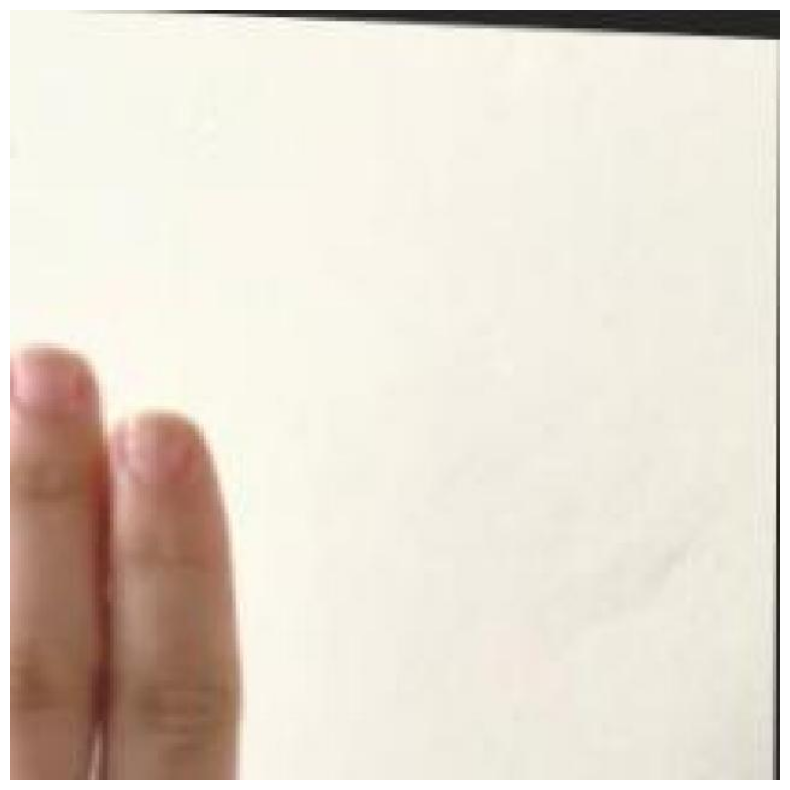

In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install YOLOv8 (Ultralytics)
!pip install ultralytics

# Import required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model from your Google Drive
model_path = "/content/drive/MyDrive/Part_1_Glove_Detections/training_results/glove_detection_yolov8s_improved/best.pt"
model = YOLO(model_path)

# Test the model on an image (update image path if needed)
image_path = "/content/drive/MyDrive/Part_1_Glove_Detections/training_results/glove_detection_yolov8s_improved/4_jpg.rf.9225a1bf4482af60314aef28eb320d82.jpg"
results = model(image_path, save=True)  # save=True will save results inside 'runs/detect/predict'

# Show results
for r in results:
    im_bgr = r.plot()  # Plot predictions on the image
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.axis("off")
    plt.show()


In [10]:
import os

# Path to your model folder
path = "/content/drive/MyDrive/Part_1_Glove_Detections/training_results/glove_detection_yolov8s_improved"

# List all files in the folder
print(os.listdir(path))


['BoxP_curve.png', 'results.png', 'val_batch1_pred.jpg', 'BoxPR_curve.png', 'labels_correlogram.jpg', 'labels.jpg', 'val_batch2_labels.jpg', 'results.csv', 'train_batch2.jpg', 'val_batch0_pred.jpg', 'train_batch1.jpg', 'args.yaml', 'BoxF1_curve.png', 'val_batch0_labels.jpg', 'confusion_matrix.png', 'train_batch0.jpg', 'BoxR_curve.png', 'confusion_matrix_normalized.png', 'val_batch2_pred.jpg', 'val_batch1_labels.jpg', 'weights']


In [8]:
# Correct path to best.pt
model_path = "/content/drive/MyDrive/Part_1_Glove_Detections/training_results/glove_detection_yolov8s_improved/weights/best.pt"

# Load YOLO model
model = YOLO(model_path)


In [9]:
# Correct path to best.pt
model_path = "/content/drive/MyDrive/Part_1_Glove_Detections/training_results/glove_detection_yolov8s_improved/weights/last.pt"

# Load YOLO model
model = YOLO(model_path)


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls "My Drive / Part_1_Glove_Detections / training_results / glove_detection_yolov8s_improved / weights / best.pt"


ls: cannot access 'My Drive / Part_1_Glove_Detections / training_results / glove_detection_yolov8s_improved / weights / best.pt': No such file or directory


STREAMLIT

In [17]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.9 MB/s eta 0:00:00


In [18]:
import streamlit as st
from ultralytics import YOLO
from PIL import Image
import tempfile
import os

# Load your trained YOLOv8 model
MODEL_PATH = "/content/drive/MyDrive/Part_1_Glove_Detections/training_results/glove_detection_yolov8s_improved/weights/best.pt"
model = YOLO(MODEL_PATH)

st.set_page_config(page_title="Glove Detection App", layout="wide")
st.title("🧤 Glove Detection with YOLOv8")

# File uploader
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file:
    # Open uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Save temporarily
    temp_dir = tempfile.mkdtemp()
    temp_path = os.path.join(temp_dir, uploaded_file.name)
    image.save(temp_path)

    # Run YOLO inference
    st.write("🔍 Running detection...")
    results = model.predict(temp_path, save=True, conf=0.25)

    # Get saved output image path
    result_img_path = results[0].save_dir / results[0].path.name

    # Display result
    result_img = Image.open(result_img_path)
    st.image(result_img, caption="Detection Result", use_column_width=True)

    # Show raw results (optional)
    st.write("📊 Detection Details:")
    st.json(results[0].tojson())


2025-08-25 12:24:27.170 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 12:24:27.174 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 12:24:27.382 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-25 12:24:27.386 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 12:24:27.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 12:24:27.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 12:24:27.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

Load YOLOv8m Model

In [19]:
# Load YOLOv8m (Medium) for better accuracy
print(" LOADING YOLOv8m (MEDIUM) FOR BETTER DETECTION")
print("=" * 55)

# Load medium model
model = YOLO('yolov8m.pt')

print(" YOLOv8m loaded successfully!")
print(" Model Info:")
print("   Parameters: ~25.9M (vs 11M small)")
print("   Expected accuracy: 75-85% mAP50")
print("   Training time: 2-3 hours on GPU")
print("   Better at detecting both classes!")

 LOADING YOLOv8m (MEDIUM) FOR BETTER DETECTION


 YOLOv8m loaded successfully!
 Model Info:
   Parameters: ~25.9M (vs 11M small)
   Expected accuracy: 75-85% mAP50
   Training time: 2-3 hours on GPU
   Better at detecting both classes!
